In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/hughesj/Downloads/df_atp.csv")

C:\Users\hughesj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15,21,22,28,31,47,48,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Creating dataframe of winners

In [3]:
winning_odds = df.loc[df["Surface"] == ("Hard" or "Clay")] #slicing for most popular 2 surfaces
winning_odds= winning_odds[["B365W","PSW","Date"]] #only taking relevant columns
winning_odds = winning_odds.dropna() #dropping null rows
winning_odds['Bet365_prob'] = 1/winning_odds['B365W']
winning_odds['Pinnacle_prob'] = 1/winning_odds['PSW'] #converting odds to probabilities
winning_odds['Did_win'] = 1 #1 for winners 0 for losers
winning_odds= winning_odds[["Date","Bet365_prob","Pinnacle_prob", "Did_win"]] #cutting columns and keeping only common columns so we can append to dataframe of losing odds

## Creating dataframe of losers

In [4]:
losing_odds = df.loc[df["Surface"] == ("Hard" or "Clay")] #slicing for most popular 2 surfaces
losing_odds= losing_odds[["B365L","PSL","Date"]] #only taking relevant columns
losing_odds = losing_odds.dropna() #dropping null rows
losing_odds['Bet365_prob'] = 1/losing_odds['B365L'] #converting odds to probabilities
losing_odds['Pinnacle_prob'] = 1/losing_odds['PSL'] #converting odds to probabilities
losing_odds['Did_win'] = 0 #1 for winners 0 for losers
losing_odds= losing_odds[["Date","Bet365_prob","Pinnacle_prob", "Did_win"]] #cutting columns and keeping only common columns so we can append to dataframe of winning odds

## Append winning and losing dataframes

In [5]:
all_data = winning_odds.append(losing_odds, ignore_index=True) #merge dataframes
all_data['Bet365_prob'] = all_data['Bet365_prob'].round(decimals=2)
all_data['Pinnacle_prob'] = all_data['Pinnacle_prob'].round(decimals=2) #rounding to 2 decimal places

bet365 = all_data[['Date', 'Bet365_prob', 'Did_win']] #splitting into seperate dataframes
pinnacle = all_data[['Date', 'Pinnacle_prob', 'Did_win']] 

# Bet365 Graph

Text(0, 0.5, 'Actual Prob')

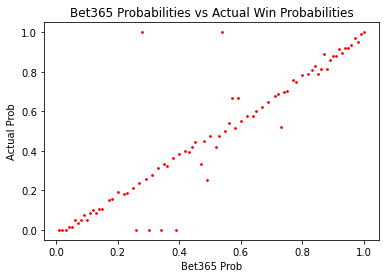

In [6]:
bet365 = bet365.groupby('Bet365_prob').agg(np.mean) #using numpy to groupby & calc avg win rate for B365 odds
bet365 = bet365.reset_index()
bet365['overround'] = bet365['Bet365_prob'] - bet365['Did_win'] # create overround column
plt.scatter(bet365['Bet365_prob'], bet365['Did_win'], color = 'red', s=3)
plt.title('Bet365 Probabilities vs Actual Win Probabilities')
plt.xlabel('Bet365 Prob')
plt.ylabel('Actual Prob')

Text(0.5, 1.0, 'Bet365 Probabilities vs Actual Win Probabilities')

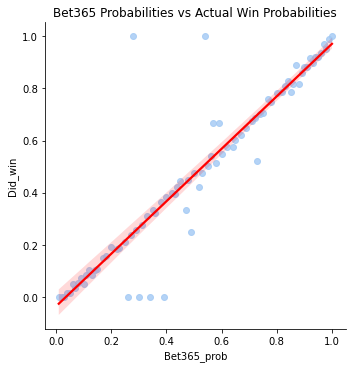

In [7]:
sns.set_palette("pastel")
sns.lmplot(x="Bet365_prob",y="Did_win",data=bet365,line_kws={'color': 'red'}) #using an lmplot to fit a line shwoing the correlation
plt.title('Bet365 Probabilities vs Actual Win Probabilities')

# Pinnacle Graph

Text(0, 0.5, 'Actual Prob')

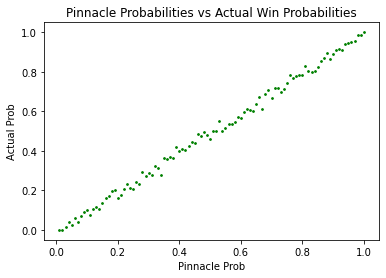

In [8]:
pinnacle = pinnacle.groupby('Pinnacle_prob').agg(np.mean) #using numpy to groupby & calc avg win rate for pinnacle odds
pinnacle = pinnacle.reset_index()
pinnacle['overround'] = pinnacle['Pinnacle_prob'] - pinnacle['Did_win'] # create overround column
plt.scatter(pinnacle['Pinnacle_prob'], pinnacle['Did_win'], color = 'green', s=3)
plt.title('Pinnacle Probabilities vs Actual Win Probabilities')
plt.xlabel('Pinnacle Prob')
plt.ylabel('Actual Prob')

Text(0.5, 1.0, 'Pinnacle Probabilities vs Actual Win Probabilities')

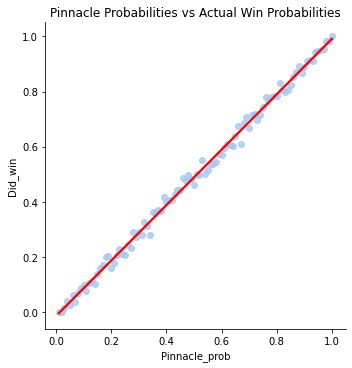

In [9]:
sns.set_palette("pastel")
sns.lmplot(x="Pinnacle_prob",y="Did_win",data=pinnacle,line_kws={'color': 'red'}) #using an lmplot to fit a line shwoing the correlation
plt.title('Pinnacle Probabilities vs Actual Win Probabilities')

# Compare Bet365 & Pinnacle Overrounds

In [10]:
bet365_overround =bet365['overround'].mean()
pinnacle_overround =pinnacle['overround'].mean() # create two floats

In [11]:
data = [[pinnacle_overround, bet365_overround]] #create list
overrounds = pd.DataFrame(data, columns = ['Pin OR', 'Bet365 OR']) # convert list to a dataframe

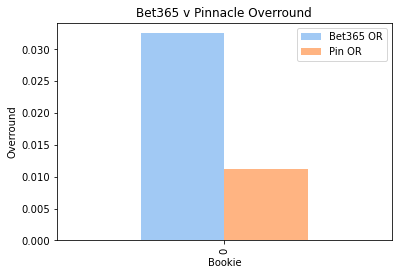

In [12]:
overrounds.plot(y=['Bet365 OR', 'Pin OR'], kind='bar')
plt.title('Bet365 v Pinnacle Overround')
plt.xlabel('Bookie')
plt.ylabel('Overround')
plt.show()

# Federer v Nadal Most Grand Slams

In [13]:
slams = df[['Date','Tournament','Series', 'Round', 'Winner']] #create slams dataframe with relevant columns
slams = slams[(slams.Series == 'Grand Slam') & (slams.Round == 'The Final')] #filter only slams & final
slams = slams[slams.Winner.isin(['Federer R.', 'Nadal R.',])] #filter only fed & nadal

In [17]:
slams['Titles'] = slams.groupby('Winner').cumcount().astype(int) + 1 #iterating through rows & cumulatively counting wins
slams['Date'] = pd.to_datetime(slams.Date, format='%d/%m/%Y') # format date
slams = slams.sort_values(['Date']) #sort by date
slams.head()

,Date,Tournament,Series,Round,Winner,Titles
10423,2003-07-06,Wimbledon,Grand Slam,The Final,Federer R.,1
11922,2004-01-31,Australian Open,Grand Slam,The Final,Federer R.,2
13285,2004-07-04,Wimbledon,Grand Slam,The Final,Federer R.,3
13958,2004-09-12,US Open,Grand Slam,The Final,Federer R.,4
15918,2005-06-05,French Open,Grand Slam,The Final,Nadal R.,1


In [18]:
federer_slams = slams[slams.Winner == 'Federer R.'] #create individual dataframes
nadal_slams = slams[slams.Winner == 'Nadal R.']

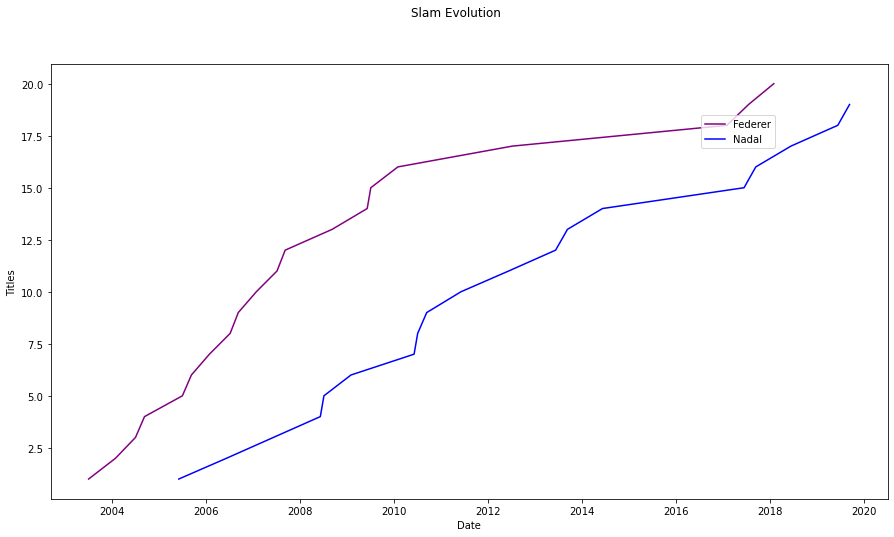

In [19]:
fig = plt.figure(figsize=(15,8)) #adjust size
sns.lineplot(x='Date', y='Titles', data=federer_slams, color='purple')
sns.lineplot(x='Date', y='Titles', data=nadal_slams, color='blue')
fig.legend(bbox_to_anchor=(-0.2, 0.8, 1., 0), labels=['Federer','Nadal',])
t=fig.suptitle('Slam Evolution')

# Grand Slam Winners

In [20]:
slams = df[df.Series == 'Grand Slam']  #creating relevant dataframes
wins = slams[['Tournament', 'Round', 'Winner']]
wins['Slams'] = wins['Tournament']
wins = wins[wins.Round == 'The Final'] #slice for finals
winners = wins.groupby('Winner')['Slams'].count() #groupby winner and slams count
winners = winners.reset_index()
winners = winners.sort_values(['Slams'], ascending=False) #sort by decending slam wins
winners.head()

C:\Users\hughesj\AppData\Local\Temp/ipykernel_8068/3235563347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins['Slams'] = wins['Tournament']


,Winner,Slams
5,Federer R.,20
13,Nadal R.,19
4,Djokovic N.,16
0,Agassi A.,3
12,Murray A.,3


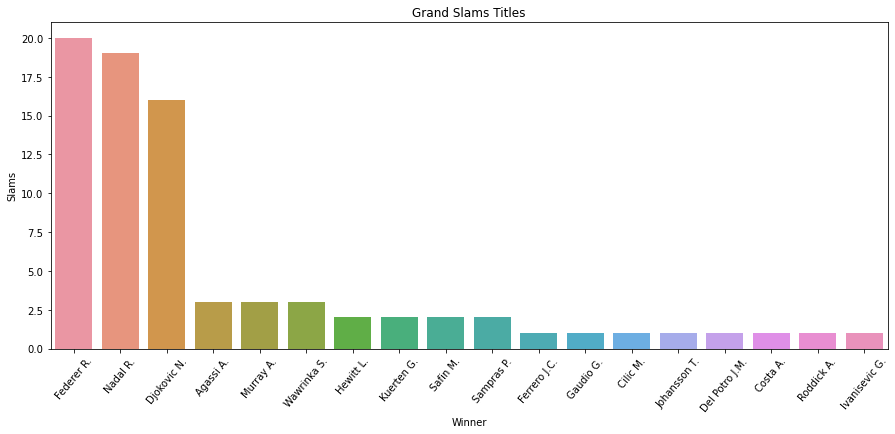

In [21]:
plt.figure(figsize=(15,6)) #plot

s = sns.barplot(x=winners.Winner, y=winners.Slams)
s.set_xticklabels(labels = winners.Winner,  rotation=50)
plt.title('Grand Slams Titles')
plt.show()

# Yearly Individual Winners

In [22]:
winners = df[['Date','Location','Tournament','Series', 'Round', 'Winner']] #create dataframe
winners = winners[winners.Round == 'The Final'] # slice final only

C:\Users\hughesj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Winner', ylabel='Density'>

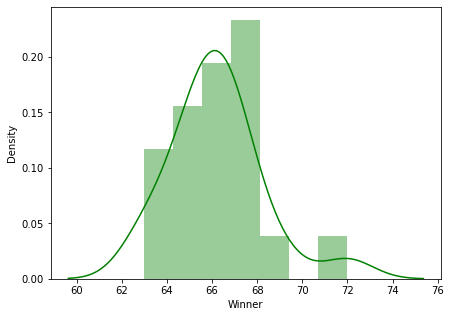

In [23]:
winners['year'] = pd.DatetimeIndex(winners['Date']).year #add year column
p = winners.groupby('year')["Winner"].count() #winners count grouped by year
plt.figure(figsize = (7, 5))
sns.distplot(p, color = 'green') #plot - 67 individual winners most common amount of yearly winners

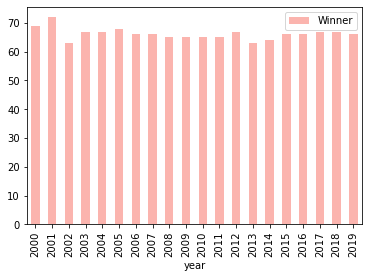

In [24]:
p = p.to_frame()
p.plot(kind="bar",cmap='Pastel1')
plt.show()#number of individual winners per year

## Players with most tournament wins per year

In [25]:
h = winners.groupby('year')["Winner"].value_counts() #create dataframe
h

year  Winner        
2000  Safin M.          7
      Corretja A.       5
      Kuerten G.        5
      Norman M.         5
      Hewitt L.         4
                       ..
2019  Schwartzman D.    1
      Shapovalov D.     1
      Sonego L.         1
      Tsitsipas S.      1
      Zverev A.         1
Name: Winner, Length: 713, dtype: int64

<AxesSubplot:xlabel='year,Winner'>

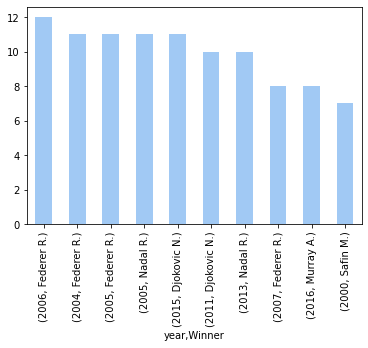

In [26]:
h.nlargest(10).plot(kind="bar")#players with most wins in a single year